In [1]:
import pandas as pd
import EDA
import preprocessing

column_credit = ['CustomerID', 'CheckingAccountBalance', 'DebtsPaid', 'SavingsAccountBalance',
                 'CurrentOpenLoanApplications']
df_credit = pd.read_csv('ds-credit.tsv', sep='\s+', header=-1, names=column_credit)

column_app = ['CustomerID', 'LoanPayoffPeriodInMonths', 'LoanReason', 'RequestedAmount', 'InterestRate',
              'Co-Applicant']
df_app = pd.read_csv('ds-app.tsv', sep='\s+', header=-1, names=column_app)

column_borrower = ['CustomerID', 'YearsAtCurrentEmployer', 'YearsInCurrentResidence', 'Age', 'RentOrOwnHome',
                   'TypeOfCurrentEmployment', 'NumberOfDependantsIncludingSelf']
df_borrower = pd.read_csv('ds-borrower.csv', sep='\s+', index_col=False, names=column_borrower, header=0)

na = preprocessing.NA(df_borrower)
na.to_num('CustomerID')
df_borrower = na.drop('CustomerID')


mg = preprocessing.Merge([df_credit, df_app, df_borrower])
df_all = mg.transform('CustomerID')

In [2]:
df = df_all.iloc[:, 1:]

In [3]:
df.notnull().sum(1).value_counts()

15    584
11     78
9      76
10     75
4      14
6      12
5      10
dtype: int64

In [4]:
na_index = df.notnull().sum(1) == 11
a_index = df.notnull().sum(1) == 15

df_na = df.loc[na_index]  # to be imputed
df_a = df.loc[df.notnull().sum(1) == 15]  # train set

In [5]:
df_na.head(1)

,CheckingAccountBalance,DebtsPaid,SavingsAccountBalance,CurrentOpenLoanApplications,LoanPayoffPeriodInMonths,LoanReason,RequestedAmount,InterestRate,Co-Applicant,YearsAtCurrentEmployer,YearsInCurrentResidence,Age,RentOrOwnHome,TypeOfCurrentEmployment,NumberOfDependantsIncludingSelf
763,NaN,NaN,NaN,NaN,18.0,auto,5866.0,2.0,none,4,2,30,owned,skilled,1.0


In [6]:
df_na.columns

Index(['CheckingAccountBalance', 'DebtsPaid', 'SavingsAccountBalance',
       'CurrentOpenLoanApplications', 'LoanPayoffPeriodInMonths', 'LoanReason',
       'RequestedAmount', 'InterestRate', 'Co-Applicant',
       'YearsAtCurrentEmployer', 'YearsInCurrentResidence', 'Age',
       'RentOrOwnHome', 'TypeOfCurrentEmployment',
       'NumberOfDependantsIncludingSelf'],
      dtype='object')

In [7]:
# combine dataframe to impute null values
df_impute = pd.concat([df_na, df_a])
df_impute['Age'] = pd.to_numeric(df.Age)

# Ordinal encoding
df_impute.iloc[:, 4:] = preprocessing.Encode().ordinal(df_impute.iloc[:, 4:])

# Set which column to be imputed
impute = preprocessing.Impute(df_impute)
impute.set_train(y='CheckingAccountBalance', col=['LoanPayoffPeriodInMonths', 'LoanReason',
       'RequestedAmount', 'InterestRate', 'Co-Applicant',
       'YearsAtCurrentEmployer', 'YearsInCurrentResidence', 'Age',
       'RentOrOwnHome', 'TypeOfCurrentEmployment',
       'NumberOfDependantsIncludingSelf'])

# Train
impute.rf(4,20)

train accuracy:
0.5582191780821918
cv accuracy:
[0.36440678 0.46610169 0.43589744 0.37931034 0.43478261]


In [8]:
# Impute
df.loc[na_index, 'CheckingAccountBalance'] = impute.yimpute

In [9]:
# combine dataframe to impute null values
df_impute = pd.concat([df_na, df_a])
df_impute['Age'] = pd.to_numeric(df.Age)

# Ordinal encoding
df_impute.iloc[:, 4:] = preprocessing.Encode().ordinal(df_impute.iloc[:, 4:])

# Set which column to be imputed
impute = preprocessing.Impute(df_impute)
impute.set_train(y='DebtsPaid', col=['LoanPayoffPeriodInMonths', 'LoanReason',
       'RequestedAmount', 'InterestRate', 'Co-Applicant',
       'YearsAtCurrentEmployer', 'YearsInCurrentResidence', 'Age',
       'RentOrOwnHome', 'TypeOfCurrentEmployment',
       'NumberOfDependantsIncludingSelf'])

# Train
impute.rf(8, 40)

train accuracy:
0.8732876712328768
cv accuracy:
[0.58974359 0.58119658 0.58119658 0.5982906  0.6637931 ]


In [10]:
# Impute
df.loc[na_index, 'DebtsPaid'] = impute.yimpute

In [11]:
# combine dataframe to impute null values
df_impute = pd.concat([df_na, df_a])
df_impute['Age'] = pd.to_numeric(df.Age)

# Ordinal encoding
df_impute.iloc[:, 4:] = preprocessing.Encode().ordinal(df_impute.iloc[:, 4:])

# Set which column to be imputed
impute = preprocessing.Impute(df_impute)
impute.set_train(y='SavingsAccountBalance', col=['LoanPayoffPeriodInMonths', 'LoanReason',
       'RequestedAmount', 'InterestRate', 'Co-Applicant',
       'YearsAtCurrentEmployer', 'YearsInCurrentResidence', 'Age',
       'RentOrOwnHome', 'TypeOfCurrentEmployment',
       'NumberOfDependantsIncludingSelf'])

# Train
impute.rf(8, 40)

train accuracy:
0.7243150684931506
cv accuracy:
[0.56779661 0.57627119 0.5982906  0.58974359 0.60526316]


In [12]:
# Impute
df.loc[na_index, 'SavingsAccountBalance'] = impute.yimpute

In [13]:
# combine dataframe to impute null values
df_impute = pd.concat([df_na, df_a])
df_impute['Age'] = pd.to_numeric(df.Age)

# Ordinal encoding
df_impute.iloc[:, 4:] = preprocessing.Encode().ordinal(df_impute.iloc[:, 4:])

# Set which column to be imputed
impute = preprocessing.Impute(df_impute)
impute.set_train(y='CurrentOpenLoanApplications', col=['LoanPayoffPeriodInMonths', 'LoanReason',
       'RequestedAmount', 'InterestRate', 'Co-Applicant',
       'YearsAtCurrentEmployer', 'YearsInCurrentResidence', 'Age',
       'RentOrOwnHome', 'TypeOfCurrentEmployment',
       'NumberOfDependantsIncludingSelf'])

# Train
impute.rf(4, 8)

train accuracy:
0.696917808219178
cv accuracy:


/home/tianyi/anaconda3/envs/insight/lib/python3.7/site-packages/sklearn/model_selection/_split.py:652: Warning: The least populated class in y has only 3 members, which is too few. The minimum number of members in any class cannot be less than n_splits=5.
  % (min_groups, self.n_splits)), Warning)


[0.61016949 0.63559322 0.63247863 0.6637931  0.66086957]


In [14]:
# Impute
df.loc[na_index, 'CurrentOpenLoanApplications'] = impute.yimpute

In [15]:
na_index = df.notnull().sum(1) == 9
df_na = df.loc[na_index]  # to be imputed

In [16]:
df_na.head(1)

,CheckingAccountBalance,DebtsPaid,SavingsAccountBalance,CurrentOpenLoanApplications,LoanPayoffPeriodInMonths,LoanReason,RequestedAmount,InterestRate,Co-Applicant,YearsAtCurrentEmployer,YearsInCurrentResidence,Age,RentOrOwnHome,TypeOfCurrentEmployment,NumberOfDependantsIncludingSelf
141,none,paid,v.high,1.0,12.0,auto,1413.0,3.0,none,NaN,NaN,NaN,NaN,NaN,NaN


In [17]:
# combine dataframe to impute null values
df_impute = pd.concat([df_na, df_a])
df_impute['Age'] = pd.to_numeric(df.Age)
col = ['CheckingAccountBalance', 'DebtsPaid', 'SavingsAccountBalance',
       'CurrentOpenLoanApplications', 'LoanPayoffPeriodInMonths', 'LoanReason',
       'RequestedAmount', 'InterestRate', 'Co-Applicant']

# Ordinal encoding
df_impute.loc[:, col] = preprocessing.Encode().ordinal(df_impute.loc[:, col])

# Set which column to be imputed
impute = preprocessing.Impute(df_impute)
impute.set_train(y='YearsAtCurrentEmployer', col=col)

# Train
impute.rf(4, 20)

train accuracy:
0.4332191780821918
cv accuracy:
[0.27118644 0.30769231 0.30769231 0.3362069  0.32758621]


In [18]:
# Impute
df.loc[na_index, 'YearsAtCurrentEmployer'] = impute.yimpute

In [19]:
# combine dataframe to impute null values
df_impute = pd.concat([df_na, df_a])
df_impute['Age'] = pd.to_numeric(df.Age)
col = ['CheckingAccountBalance', 'DebtsPaid', 'SavingsAccountBalance',
       'CurrentOpenLoanApplications', 'LoanPayoffPeriodInMonths', 'LoanReason',
       'RequestedAmount', 'InterestRate', 'Co-Applicant']

# Ordinal encoding
df_impute.loc[:, col] = preprocessing.Encode().ordinal(df_impute.loc[:, col])

# Set which column to be imputed
impute = preprocessing.Impute(df_impute)
impute.set_train(y='YearsInCurrentResidence', col=col)

# Train
impute.rf(7, 20)

train accuracy:
0.75
cv accuracy:
[0.37815126 0.36134454 0.43103448 0.33913043 0.39130435]


In [20]:
# Impute
df.loc[na_index, 'YearsInCurrentResidence'] = impute.yimpute

In [21]:
# combine dataframe to impute null values
df_impute = pd.concat([df_na, df_a])
df_impute['Age'] = pd.to_numeric(df.Age)
col = ['CheckingAccountBalance', 'DebtsPaid', 'SavingsAccountBalance',
       'CurrentOpenLoanApplications', 'LoanPayoffPeriodInMonths', 'LoanReason',
       'RequestedAmount', 'InterestRate', 'Co-Applicant']

# Ordinal encoding
df_impute.loc[:, col] = preprocessing.Encode().ordinal(df_impute.loc[:, col])

# Set which column to be imputed
impute = preprocessing.Impute(df_impute)
impute.set_train(y='Age', col=col)

# Train
impute.rf_reg()

train accuracy:
0.8126184316627836
cv accuracy:
[-0.28194324 -0.2770511  -0.0503536  -0.04483446 -0.01953749]


/home/tianyi/anaconda3/envs/insight/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [23]:
# Impute
df.loc[na_index, 'Age'] = impute.yimpute

In [24]:
# combine dataframe to impute null values
df_impute = pd.concat([df_na, df_a])
df_impute['Age'] = pd.to_numeric(df.Age)
col = ['CheckingAccountBalance', 'DebtsPaid', 'SavingsAccountBalance',
       'CurrentOpenLoanApplications', 'LoanPayoffPeriodInMonths', 'LoanReason',
       'RequestedAmount', 'InterestRate', 'Co-Applicant']

# Ordinal encoding
df_impute.loc[:, col] = preprocessing.Encode().ordinal(df_impute.loc[:, col])

# Set which column to be imputed
impute = preprocessing.Impute(df_impute)
impute.set_train(y='RentOrOwnHome', col=col)

# Train
impute.rf(7, 20)

train accuracy:
0.809931506849315
cv accuracy:
[0.71794872 0.70940171 0.7008547  0.72649573 0.70689655]


In [25]:
# Impute
df.loc[na_index, 'RentOrOwnHome'] = impute.yimpute

In [31]:
# combine dataframe to impute null values
df_impute = pd.concat([df_na, df_a])
df_impute['Age'] = pd.to_numeric(df.Age)
col = ['CheckingAccountBalance', 'DebtsPaid', 'SavingsAccountBalance',
       'CurrentOpenLoanApplications', 'LoanPayoffPeriodInMonths', 'LoanReason',
       'RequestedAmount', 'InterestRate', 'Co-Applicant']

# Ordinal encoding
df_impute.loc[:, col] = preprocessing.Encode().ordinal(df_impute.loc[:, col])

# Set which column to be imputed
impute = preprocessing.Impute(df_impute)
impute.set_train(y='TypeOfCurrentEmployment', col=col)

# Train
impute.rf(8, 20)

train accuracy:
0.8373287671232876
cv accuracy:
[0.64705882 0.66101695 0.60683761 0.63478261 0.62608696]


In [32]:
# Impute
df.loc[na_index, 'TypeOfCurrentEmployment'] = impute.yimpute

In [33]:
# combine dataframe to impute null values
df_impute = pd.concat([df_na, df_a])
df_impute['Age'] = pd.to_numeric(df.Age)
col = ['CheckingAccountBalance', 'DebtsPaid', 'SavingsAccountBalance',
       'CurrentOpenLoanApplications', 'LoanPayoffPeriodInMonths', 'LoanReason',
       'RequestedAmount', 'InterestRate', 'Co-Applicant']

# Ordinal encoding
df_impute.loc[:, col] = preprocessing.Encode().ordinal(df_impute.loc[:, col])

# Set which column to be imputed
impute = preprocessing.Impute(df_impute)
impute.set_train(y='NumberOfDependantsIncludingSelf', col=col)

# Train
impute.rf(8, 20)

train accuracy:
0.9092465753424658
cv accuracy:
[0.8559322  0.83050847 0.8362069  0.82758621 0.85344828]


In [34]:
# Impute
df.loc[na_index, 'NumberOfDependantsIncludingSelf'] = impute.yimpute

In [36]:
na_index = df.notnull().sum(1) == 10
df_na = df.loc[na_index]  # to be imputed

In [37]:
df_na.head(1)

,CheckingAccountBalance,DebtsPaid,SavingsAccountBalance,CurrentOpenLoanApplications,LoanPayoffPeriodInMonths,LoanReason,RequestedAmount,InterestRate,Co-Applicant,YearsAtCurrentEmployer,YearsInCurrentResidence,Age,RentOrOwnHome,TypeOfCurrentEmployment,NumberOfDependantsIncludingSelf
422,debt,paid,medium,1.0,NaN,NaN,NaN,NaN,NaN,7,3,30,owned,self,2.0


In [45]:
# combine dataframe to impute null values
df_impute = pd.concat([df_na, df_a])
df_impute['Age'] = pd.to_numeric(df.Age)
col = ['CheckingAccountBalance', 'DebtsPaid', 'SavingsAccountBalance',
       'CurrentOpenLoanApplications', 
       'YearsAtCurrentEmployer', 'YearsInCurrentResidence', 'Age',
       'RentOrOwnHome', 'TypeOfCurrentEmployment',
       'NumberOfDependantsIncludingSelf']

# Ordinal encoding
df_impute.loc[:, col] = preprocessing.Encode().ordinal(df_impute.loc[:, col])

# Set which column to be imputed
impute = preprocessing.Impute(df_impute)
impute.set_train(y='LoanPayoffPeriodInMonths', col=col)

# Train
impute.rf()

train accuracy:
0.976027397260274
cv accuracy:


/home/tianyi/anaconda3/envs/insight/lib/python3.7/site-packages/sklearn/model_selection/_split.py:652: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=5.
  % (min_groups, self.n_splits)), Warning)


[0.12121212 0.1300813  0.10344828 0.19266055 0.10576923]


In [46]:
# Impute
df.loc[na_index, 'LoanPayoffPeriodInMonths'] = impute.yimpute

In [71]:
# combine dataframe to impute null values
df_impute = pd.concat([df_na, df_a])
df_impute['Age'] = pd.to_numeric(df.Age)
col = ['CheckingAccountBalance', 'DebtsPaid', 'SavingsAccountBalance',
       'CurrentOpenLoanApplications', 
       'YearsAtCurrentEmployer', 'YearsInCurrentResidence', 'Age',
       'RentOrOwnHome', 'TypeOfCurrentEmployment',
       'NumberOfDependantsIncludingSelf']

# Ordinal encoding
df_impute.loc[:, col] = preprocessing.Encode().ordinal(df_impute.loc[:, col])

# Set which column to be imputed
impute = preprocessing.Impute(df_impute)
impute.set_train(y='LoanReason', col=col)

# Train
impute.rf(8, 20)

train accuracy:
0.7654109589041096
cv accuracy:
[0.51260504 0.37288136 0.47863248 0.43103448 0.49122807]


In [73]:
# Impute
df.loc[na_index, 'LoanReason'] = impute.yimpute

In [52]:
# combine dataframe to impute null values
df_impute = pd.concat([df_na, df_a])
df_impute['Age'] = pd.to_numeric(df.Age)
col = ['CheckingAccountBalance', 'DebtsPaid', 'SavingsAccountBalance',
       'CurrentOpenLoanApplications', 
       'YearsAtCurrentEmployer', 'YearsInCurrentResidence', 'Age',
       'RentOrOwnHome', 'TypeOfCurrentEmployment',
       'NumberOfDependantsIncludingSelf']

# Ordinal encoding
df_impute.loc[:, col] = preprocessing.Encode().ordinal(df_impute.loc[:, col])

# Set which column to be imputed
impute = preprocessing.Impute(df_impute)
impute.set_train(y='RequestedAmount', col=col)

# Train
impute.lasso()

train accuracy:
0.10159295339336849
cv accuracy:
[ 0.07495687  0.09651404  0.07990067 -0.00848572 -0.00158768]


In [53]:
# Impute
df.loc[na_index, 'RequestedAmount'] = impute.yimpute

In [57]:
# combine dataframe to impute null values
df_impute = pd.concat([df_na, df_a])
df_impute['Age'] = pd.to_numeric(df.Age)
col = ['CheckingAccountBalance', 'DebtsPaid', 'SavingsAccountBalance',
       'CurrentOpenLoanApplications', 
       'YearsAtCurrentEmployer', 'YearsInCurrentResidence', 'Age',
       'RentOrOwnHome', 'TypeOfCurrentEmployment',
       'NumberOfDependantsIncludingSelf']

# Ordinal encoding
df_impute.loc[:, col] = preprocessing.Encode().ordinal(df_impute.loc[:, col])

# Set which column to be imputed
impute = preprocessing.Impute(df_impute)
impute.set_train(y='InterestRate', col=col)

# Train
impute.rf(8,8)

train accuracy:
0.7123287671232876
cv accuracy:
[0.41176471 0.43697479 0.43103448 0.3826087  0.46086957]


In [58]:
# Impute
df.loc[na_index, 'InterestRate'] = impute.yimpute

In [61]:
# combine dataframe to impute null values
df_impute = pd.concat([df_na, df_a])
df_impute['Age'] = pd.to_numeric(df.Age)
col = ['CheckingAccountBalance', 'DebtsPaid', 'SavingsAccountBalance',
       'CurrentOpenLoanApplications', 
       'YearsAtCurrentEmployer', 'YearsInCurrentResidence', 'Age',
       'RentOrOwnHome', 'TypeOfCurrentEmployment',
       'NumberOfDependantsIncludingSelf']

# Ordinal encoding
df_impute.loc[:, col] = preprocessing.Encode().ordinal(df_impute.loc[:, col])

# Set which column to be imputed
impute = preprocessing.Impute(df_impute)
impute.set_train(y='Co-Applicant', col=col)

# Train
impute.rf(20,50)

train accuracy:
0.9982876712328768
cv accuracy:
[0.8974359  0.88034188 0.88888889 0.8974359  0.89655172]


In [62]:
# Impute
df.loc[na_index, 'Co-Applicant'] = impute.yimpute

In [65]:
df.isnull().sum()

CheckingAccountBalance             22
DebtsPaid                          22
SavingsAccountBalance              22
CurrentOpenLoanApplications        22
LoanPayoffPeriodInMonths           26
LoanReason                         26
RequestedAmount                    26
InterestRate                       26
Co-Applicant                       26
YearsAtCurrentEmployer             24
YearsInCurrentResidence            24
Age                                24
RentOrOwnHome                      24
TypeOfCurrentEmployment            24
NumberOfDependantsIncludingSelf    24
dtype: int64

In [66]:
na = preprocessing.NA(df)
df = na.replace()

In [68]:
import classification

In [75]:
df['Age'] = pd.to_numeric(df.Age)


In [81]:
df.shape

(849, 15)

In [95]:
column_result = ['CustomerID', 'WasTheLoanApproved']
df_result = pd.read_csv('ds-result.tsv', sep='\s+', header=-1, names=column_result)
df_result = df_result.drop_duplicates()  # Drop the duplicated results
na = preprocessing.NA(df_result)
na.to_num('CustomerID')
df_result = na.drop('CustomerID')

In [96]:
df['CustomerID'] = df_all.CustomerID

In [98]:
df_new = pd.merge(df,df_result, on='CustomerID', how='outer')

In [128]:
d = df_new.loc[(df_new.WasTheLoanApproved == 'Y') | (df_new.WasTheLoanApproved == 'N')]
d = d.drop('CustomerID',1)
d = preprocessing.Encode().ordinal(d)

In [129]:
x = d.iloc[:, :-1].values
y = d.iloc[:, -1:].values.reshape(-1,1)

In [130]:
lr = classification.Lr(x, y)
lr.fit()

Train set accuracy:
0.7073578595317725
Test set accuracy:
0.6933333333333334


/home/tianyi/anaconda3/envs/insight/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/tianyi/anaconda3/envs/insight/lib/python3.7/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


/home/tianyi/anaconda3/envs/insight/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/tianyi/anaconda3/envs/insight/lib/python3.7/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/tianyi/anaconda3/envs/insight/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/tianyi/anaconda3/envs/insight/lib/python3.7/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = c

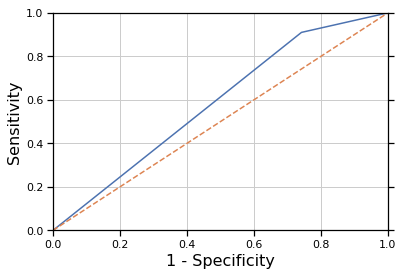

0.5841293454431569


In [131]:
classification.Roc(lr.model).plot(lr.xtr, lr.ytr)

In [133]:
df_new.shape

(849, 17)